# Graded Challenge 1
## Fathiyah Kalamal Haq - Batch 009


Pokemon adalah video game yang rilis pada tahun 1996 dan masih dikenal hingga hari ini dengan berbagai perubahan media permainannya. Banyak yang telah memainkan game Pokemon ini dari kalangan anak-anak hingga dewasa hingga dijadikan series dan film layar lebar. Pokemon memiliki banyak karakter dengan keunikannya masing-masing. Lalu bagaimanakah cara efektif dalam memenangkan permainan ini? tentunya dengan strategi permainan yang baik. 

Strategi yang tepat adalah menganalisa informasi karakter-karakternya melalui dataset Pokemon. Hasil yang ingin didapat dari analisa data ini adalah mendapatkan informasi terkait se-efektif apakah kemampuan suatu karakter jika melawan karakter lainnya, dan karakter mana yang paling fleksibel dalam melawan pokemon lain.

# Data Loading

Langkah pertama yang dilakukan adalah dengan mengobservasi dataset Pokemon terlebih dahulu. untuk itu, dilakukan import package pandas (didefinisikan sebagai pd) dan numpy (didefinisikan sebagai np).

In [2]:
import pandas as pd
import numpy as np

In [3]:
pk = pd.read_csv('Pokemon.csv')
pk.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [4]:
pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Terdapat 800 baris dan 13 kolom dari dataset pokemon. Data Frame tersebut memiliki beragam tipe data (integer, object, dan boolean). 
Pada kolom Type 2 terdapat 414 baris saja yang terisi sedangkan sisanya adalah data kosong atau missing value. Maka langkah selanjutnya adalah dengan menghilangkan data-data kosong tersebut.

# Data Cleaning

In [5]:
pk.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Missing value yang terdeteksi pada kolom Type 2 sebanyak 386 baris. 
Maka langkah selanjutnya adalah menghapus baris-baris yang terdapat missing values.

In [6]:
pk = pk.dropna()
pk

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [7]:
pk.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

Total baris pada Dataset Pokemon adalah 414 baris yang artinya telah dilakukan penghapusan baris sebanyak 386 baris dari dataset.
setelah diperiksa kembali, ternyat sudah tidak ada lagi missing value. 
Kemudian, akan dilakukan penghapusan kolom yang tidak diperlukan seperti pada kolom # dan mengganti nama kolom Sp. Atk dan Sp. Def menjadi Special Attack dan Special Defense

In [8]:
#menghapus kolom 
pk = pk.drop('#', axis=1)
pk.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False


In [9]:
#ganti nama kolom
pk.rename(columns={ 'Sp. Atk': 'Special Attack',
                    'Sp. Def': 'Special Defense'}
                    , inplace=True
)
pk.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False


# Data Exploration

## **Topic 1** 
Mengetahui Pokemon yang unggul dalam pertandingan

In [10]:
pk.nunique()

Name               414
Type 1              18
Type 2              18
Total              146
HP                  72
Attack              95
Defense             86
Special Attack      85
Special Defense     74
Speed               94
Generation           6
Legendary            2
dtype: int64

Dataset Pokemon berisi 18 tipe kemampuan pokemon, 6 generasi, data-data skill dan pokemon tersebut termasuk legendary pokemon atau tidak. Legendary pokemon ini adalah pokemon yang sangat langka dan kuat (Wikipedia).

Kolom Total adalah nilai gabungan dari kolom HP hingga Speed, sehingga dapat menjadi faktor penilaian keunggulan suatu pokemon.

In [26]:
pk['Total'].mean()

456.6280193236715

In [12]:
pk[
    (pk["Total"] >=pk['Total'].mean())
][['Name','Total']].sort_values('Total',ascending=False)

,Name,Total
163,MewtwoMega Mewtwo X,780
426,RayquazaMega Rayquaza,780
424,GroudonPrimal Groudon,770
418,LatiasMega Latias,700
268,TyranitarMega Tyranitar,700
...,...,...
390,Tropius,460
185,Lanturn,460
310,Breloom,460
92,Dodrio,460


Terdapat 230 pokemon berada diatas rata-rata Total kemampuan diri. Perolehan Total terbesar adalah dari MewtwoMega Mewtwo X	dan RayquazaMega Rayquaza.
Namun, dari sini saja belum bisa menemukan kedua pokemon tersebut unggul dalam hal apa.

In [13]:
pk[pk['Total']==780][['Name','Type 1','Type 2','Legendary']]

,Name,Type 1,Type 2,Legendary
163,MewtwoMega Mewtwo X,Psychic,Fighting,True
426,RayquazaMega Rayquaza,Dragon,Flying,True


pokemon dengan total terbesar memiliki kemampuan psychic-fighting dan Dragon-flying dan keduanya adalah Legendary Pokemon. Sehingga kedua Pokemon tersebut dapat dikatakan lebih unggul dari pokemon lainnya

<AxesSubplot:xlabel='Name'>

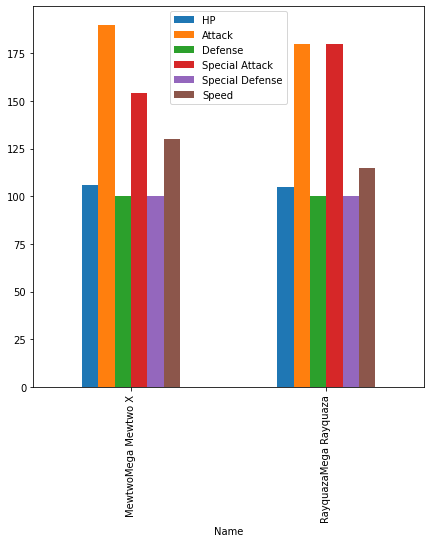

In [14]:
pk[pk['Total']==780][['Name','HP','Attack','Defense','Special Attack','Special Defense','Speed']].plot(kind='bar',x='Name',figsize=(7,7))

Jika ditinjau dari Health Points, Attack, Defense, Special Attack, Special Defense, dan Speed pada kedua pokemon tersebut, pokemon Meowtwo X memiliki kemampuan menyerang lebih besar dibandingkan Rayquaza. Meowtwo X juga lebih cepat dari Rayquaza. Namun untuk Special Attack Rayquaza lebih unggul. Adapun dalam kemampuan bertahan (Defense) keduanya setara. Health Points Meowtwo X lebih besar dari Rayquaza namun tidak terlalu signifikan perbedaannya.

## **Topic 2**
Membuktikan bahwa Legendary Pokemon adalah sangat kuat dan langka.

In [15]:
pk.groupby(['Generation','Legendary'])['Total'].mean()

Generation  Legendary
1           False        437.486486
            True         630.000000
2           False        427.433962
            True         680.000000
3           False        429.689189
            True         678.750000
4           False        461.573770
            True         653.333333
5           False        431.536232
            True         624.615385
6           False        429.697674
            True         637.142857
Name: Total, dtype: float64

Legendary Pokemon terbukti merupakan pokemon yang kuat karena rerata Total legendary pokemon dari setiap generasi diatas rata-rata keseluruhan Total. 

In [16]:
pk.groupby(['Generation','Legendary']).agg({'Name':'count','HP':"mean", 'Attack':'mean', 'Defense':'mean'})

Name          HP      Attack     Defense
Generation Legendary                                          
1          False        74   66.918919   79.310811   76.243243
           True          4   94.000000  116.250000   93.750000
2          False        53   69.056604   73.716981   79.679245
           True          2  106.000000  110.000000  110.000000
3          False        74   64.175676   81.702703   74.824324
           True          8   91.250000  126.250000  105.000000
4          False        61   69.754098   82.803279   81.032787
           True          6  113.500000  108.833333  103.500000
5          False        69   71.289855   79.231884   75.173913
           True         13   98.769231  122.230769   93.153846
6          False        43   66.441860   76.418605   80.720930
           True          7   82.000000  124.428571  102.285714

Dari setiap Generasi Legendary Pokemon jumlahnya jauh lebih sedikit dari non-Legendary Pokemon. 
Sehingga Legendary Pokemon adalah Pokemon yang langka dan sulit ditemui.

## **Topic 3**
Menentukan tipe pokemon terlemah

In [23]:
pk['Total'].mean()

456.6280193236715

In [17]:
pk[
    (pk["Total"] <=pk['Total'].mean())
][['Name','Total','Type 1','Type 2']].sort_values('Total')

,Name,Total,Type 1,Type 2
322,Azurill,190,Normal,Fairy
16,Weedle,195,Bug,Poison
303,Ralts,198,Psychic,Fairy
17,Kakuna,205,Bug,Poison
188,Igglybuff,210,Normal,Fairy
...,...,...,...,...
54,Venomoth,450,Bug,Poison
133,Jynx,455,Ice,Psychic
218,Girafarig,455,Normal,Psychic
47,Golbat,455,Poison,Flying


Perolehan Total terendah adalah Azurill yang bertipe Normal dan Fairy.

In [18]:
pk.groupby(['Type 2']).agg({'Type 2':'count','Total':"mean", 'Attack':'mean', 'Defense':'mean'}).sort_values('Total')

,Type 2,Total,Attack,Defense
Type 2,,,,
Bug,3,393.333333,90.000000,80.000000
Poison,34,396.500000,67.588235,59.558824
Grass,25,408.920000,74.160000,80.120000
Normal,4,411.500000,52.750000,53.750000
Fairy,23,417.956522,61.608696,73.869565
Water,14,418.214286,70.142857,85.071429
Ghost,14,430.714286,84.142857,82.285714
Rock,14,434.642857,84.000000,126.857143
Ground,35,444.342857,89.857143,90.314286


In [19]:
pk['Attack'].mean()

83.17391304347827

In [20]:
pk['Defense'].mean()

79.67632850241546

Tipe Bug memperoleh rata-rata total terendah, namun dalam hal Attack dan Defense masih diatas rata-rata keseluruhan Attack dan Defense. Sedangkan untuk tipe Normal dan Fairy berada dibawah rata-rata keseluruhan dalam hal Attack dan Defense. Agar lebih mudah mencari tipe Pokemon terlemah baiknya divisualisasikan kedalam sebuah graf sebagai berikut:

<AxesSubplot:ylabel='Type 1'>

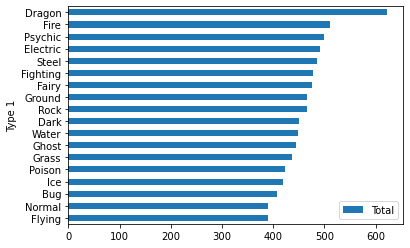

In [24]:
pk.groupby(['Type 1']).agg({'Total':'mean'}).sort_values('Total').plot(kind='barh')

<AxesSubplot:ylabel='Type 2'>

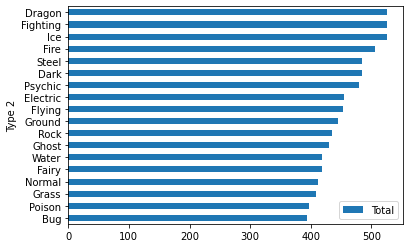

In [21]:
pk.groupby(['Type 2']).agg({'Total':'mean'}).sort_values('Total').plot(kind='barh')

Kedua Tabel diatas menggambarkan keadaan tipe pokemon berdasarkan rata-rata Total kemampuan. Pada Tipe 1, terdapat lima kemampuan dengan rata-rata Total terendah yaitu Flying, Normal, Bug, Ice, Poison. Sedangkan pada tipe 2 adalah Bug, Poison, Grass, Normal, Fairy. Jadi jika diiriskan, Tipe Pokemon yang rata-rata Totalnya terendah adalah Normal, Bug, Ice, Poison, Grass, Flying dan Fairy.

Adapun untuk Rangking 5 tertinggi Tipe 1 dari rata-rata Total adalah Dragon, Fire, Psychic, Electric dan Steel. Sedangkan Tipe 2 adalah Dragon, Fighting, Ice, Fire, dan Steel. Gabungan dari keduanya adalah Dragon, Psychic, Electric, Steel, Fighting, Ice, dan Fire

Pada kedua klasifikasi tersebut, ice pokemon masuk kedalam rangking tertinggi dan terendah, sehingga tipe ice ini bisa dianggap netral. 

## Kesimpulan

Dari ketiga topik, didapat beberapa poin penting dalam mengenal Pokemon yaitu
- Pokemon terkuat adalah MeowTwo X dan Raygaza
- Legendary Pokemon adalah Pokemon yang langka dan sangat kuat.
- Tipe Kemampuan Pokemon terlemah umumnya adalah Normal, Bug, Poison, Grass, Flying dan Fairy.
- Tipe Kemampuan Pokemon terkuat umumnya adalah Dragon, Psychic, Electric, Steel, Fighting, dan Fire.


Jadi, dari pengolahan dataset Pokemon ini dapat diambil sebuah insight yaitu saat bermain game Pokemon, usahakan mendapat karakter MeowTwo dan Rayquaza, atau pilih Legendary Pokemon saat berada di pertandingan yang sulit. Jika tidak memiliki Legendary Pokemon, setidaknya pilihlah karakter Pokemon yang bertipe Dragon, Psychic, Electric, Steel, Fighting, dan Fire.